#TP3
▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
from glob import glob
import cv2

# Visualizamos las imagenes

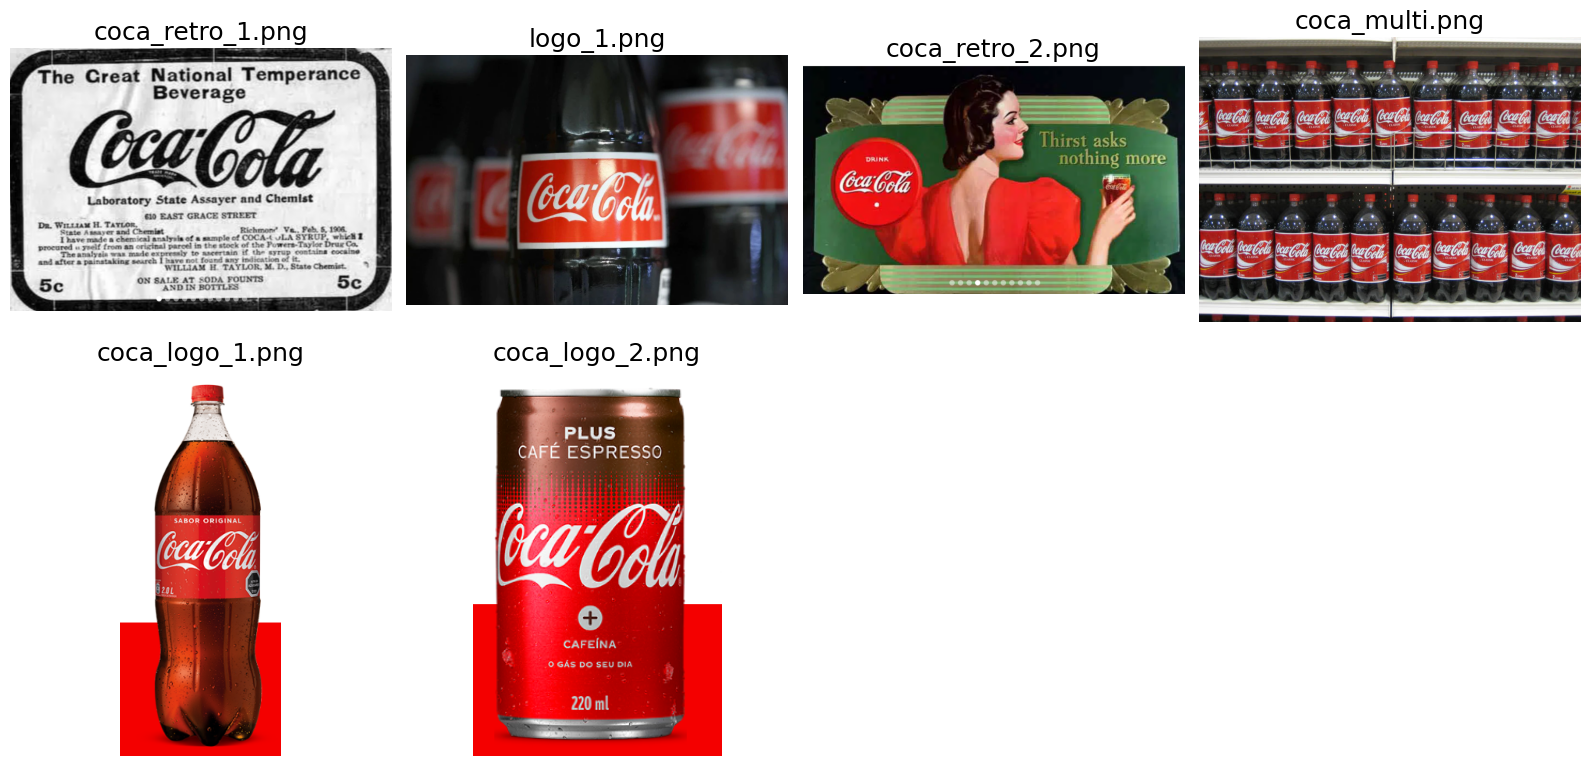

In [2]:
df_img_shapes=pd.DataFrame( )
data=[]
# Ruta a tu carpeta de imágenes
folder_path = '/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes'

# Obtener lista de imágenes
image_paths = glob(os.path.join(folder_path, '*.png'))

# Cantidad de imágenes por fila
cols = 4
rows = (len(image_paths) + cols - 1) // cols

plt.figure(figsize=(4 * cols, 4 * rows))

for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    if img is not None:
        shape = img.shape
        name = os.path.basename(img_path)
        data.append({
            'Nombre': name,
            'Alto': shape[0],
            'Ancho': shape[1],
            'Canales': shape[2] if len(shape) == 3 else 1
        })





        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        df_img_shapes = pd.DataFrame(data)
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img_rgb)
        plt.title(os.path.basename(img_path), fontsize=18)
        plt.axis('off')
    else:
        print(f"No se pudo leer la imagen: {img_path}")

plt.tight_layout()
plt.show()



Transformamos el template  para poder lograr mayores coincidencia en cuanto a los colores en los que aparece el logo en cada imagen.

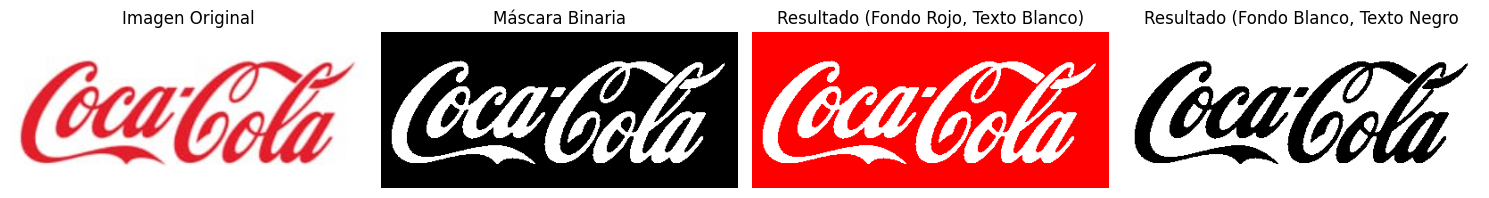

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/pattern_tp3.png")
if img is None:
    raise FileNotFoundError("No se pudo cargar la imagen: pattern_tp3.png")

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Separar el texto (rojo) del fondo (blanco).

threshold_value = 200
_, mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Explicación:
# - Los píxeles > threshold_value (fondo blanco) se vuelven 0 en 'mask' (negro).
# - Los píxeles <= threshold_value (texto rojo o zonas oscuras) se vuelven 255 (blanco).
# - THRESH_BINARY_INV invierte el resultado, por lo que el texto será '255' y el fondo '0'.
"""
Template fondo blanco texto negro
"""
(h, w) = img.shape[:2]
output_negro = np.zeros((h, w, 3), dtype=np.uint8)
output_negro[mask == 255] = (0, 0, 0)  # Fondo en blanco
output_negro[mask == 0] = (255, 255, 255)
# Crear nueva imagen con BGR
(h, w) = img.shape[:2]
output = np.zeros((h, w, 3), dtype=np.uint8)

# Asignar rojo al fondo, blanco al texto
# - Donde mask = 0 => fondo => rojo BGR(0,0,255)
# - Donde mask = 255 => texto => blanco BGR(255,255,255)
"""
Template fondo rojo texto negro
"""

output[mask == 0] = (0, 0, 255)       # Fondo en rojo
output[mask == 255] = (255, 255, 255) # Texto en blanco

# Mostrar resultados
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Máscara Binaria")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title("Resultado (Fondo Rojo, Texto Blanco)")
axs[2].axis("off")
axs[3].imshow(cv2.cvtColor(output_negro, cv2.COLOR_BGR2RGB))
axs[3].set_title("Resultado (Fondo Blanco, Texto Negro")
axs[3].axis("off")

plt.tight_layout()
plt.show()


# Guardamos los templates generados como imagenes

In [6]:
temp_fondo_blanco=cv2.cvtColor(output_negro, cv2.COLOR_BGR2RGB)
#guardo el template
resultado = cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_blanco_negro.png", temp_fondo_blanco)

In [7]:
temp_fondo_rojo=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
resultado = cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_rojo_blanco.png", temp_fondo_rojo)

In [8]:
temp_fondo_negro=mask
resultado = cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_negro_blanco.png", temp_fondo_negro)

In [9]:
temp_fondo_blanco
resultado = cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_negro_blanco.png", temp_fondo_blanco)

Verifico el tamaño de cada imagen respecto del template

In [10]:
df_img_shapes['TemplateEscalaOk'] = df_img_shapes.apply(
    lambda row: True if ((row['Alto'] > 175) and (row['Ancho'] > 400)) else False,
    axis=1
)
df_img_shapes

,Nombre,Alto,Ancho,Canales,TemplateEscalaOk
0,coca_retro_1.png,493,715,3,True
1,logo_1.png,450,687,3,True
2,coca_retro_2.png,429,715,3,True
3,coca_multi.png,598,799,3,True
4,coca_logo_1.png,500,207,3,False
5,coca_logo_2.png,363,233,3,False


VAmos a aplicar Template con diferentes metricas en pos de intentar reconocer el patron en cada una de las imagenes

True


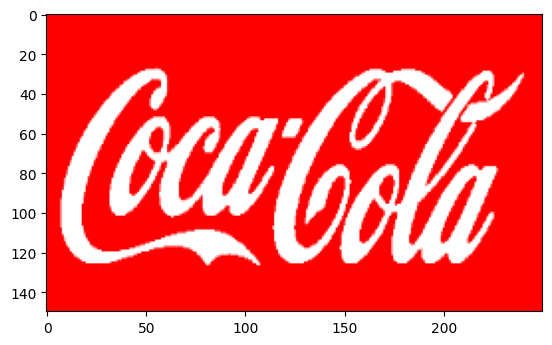

In [126]:
mask_resize=cv2.resize(mask,(120,50))
musk_roja_blanco_resize_137_50=cv2.resize(temp_fondo_rojo,(137,50))
musk_roja_blanco_resize_250_150=cv2.resize(temp_fondo_rojo,(250,150))
musk_roja_blanco_resize_150_50=cv2.resize(temp_fondo_rojo,(150,50))
musk_roja_blanco_resize_170_100=cv2.resize(temp_fondo_rojo,(170,100))
musk_roja_blanco_resize_80_30=cv2.resize(temp_fondo_rojo,(80,30))
musk_roja_blanco_resize_130_40=cv2.resize(temp_fondo_rojo,(130,40))
musk_fondoBlanco_letraNegra_resize=cv2.resize(temp_fondo_blanco,(500,170))

cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_coca_retro_2.png", musk_roja_blanco_resize_130_40)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_coca_retro_1.png", musk_fondoBlanco_letraNegra_resize)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_logo_1.png", musk_roja_blanco_resize_250_150)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_coca_logo_1.png",musk_roja_blanco_resize_150_50)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_coca_logo_2.png",musk_roja_blanco_resize_170_100)
a=cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates/temp_coca_multi.png",musk_roja_blanco_resize_80_30)
#template_positivos={'coca_retro_2':'musk_roja_blanco_resize_137_50','coca_retro_1':'musk_Blanco_Negro_resize'}
print(a)

plt.figure()
plt.imshow(musk_roja_blanco_resize_250_150, cmap='gray')
plt.show()
#plt.figure(figsize=(20,20))


In [109]:
# Cargamos la imagen a procesar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_retro_1.png')
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_retro_2.png')
#img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/logo_1.png')
#img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/logo_1.png')
#img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_logo_1.png')
#img = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_multi.png')
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_edges = cv.Canny(img, 220, 260, apertureSize =3)

# Probamos las funciones 2 creadas para detectar el logo en la imagen

In [ ]:
best_template_matching(img_rgb,musk_roja_blanco_resize_130_40,False,True)

In [ ]:
match_with_inferred_template(
    '/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_multi.png',
    template_dir="/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/templates",
                                 convert_to_gray=True,
                                 show_all_matches=False)

In [133]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def best_template_matching(img, template_img, convert_to_gray=True, show_all_matches=False):
    """
    Realiza template matching utilizando múltiples métodos y retorna dos resultados:
       - El mejor resultado entre los métodos basados en minimización
         (TM_SQDIFF y TM_SQDIFF_NORMED).
       - El mejor resultado entre los métodos basados en correlación
         (TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR y TM_CCORR_NORMED).

    Además, grafica en una figura:
       - Si show_all_matches es True: se muestran los resultados de todos los métodos en una cuadrícula.
       - Si show_all_matches es False: se muestran únicamente dos subplots con los dos mejores resultados.

    Parámetros:
       - img: Imagen en la que se realizará el match (puede ser color o escala de grises).
       - template_img: Imagen de la plantilla (puede ser color o escala de grises).
       - convert_to_gray (bool, opcional): Si True (por defecto), se convierten ambas imágenes a escala de grises.
         Si es False, se usan las imágenes sin modificar.
       - show_all_matches (bool, opcional): Si True, se grafica la imagen de cada método; si False,
         se grafican solo los dos mejores resultados.

    Retorna:
       Un diccionario con dos claves:
         "SQDIFF": {
             "method": método usado (string),
             "score": score obtenido,
             "result_img": imagen con el rectángulo dibujado.
         }
         "CORR": {
             "method": método usado (string),
             "score": score obtenido,
             "result_img": imagen con el rectángulo dibujado.
         }
    """
    # Procesar la imagen principal
    if convert_to_gray:
        if len(img.shape) == 3:
            img_proc = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        else:
            img_proc = img.copy()
    else:
        img_proc = img.copy()

    # Procesar la plantilla
    if convert_to_gray:
        if len(template_img.shape) == 3:
            template_proc = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
        else:
            template_proc = template_img.copy()
    else:
        template_proc = template_img.copy()

    # Obtener dimensiones del template (ancho y alto)
    if len(template_proc.shape) == 2:
        w, h = template_proc.shape[::-1]
    else:
        w, h = template_proc.shape[1], template_proc.shape[0]

    # Lista de métodos de template matching a evaluar (en formato string para usar eval)
    methods_list = [
        'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED',
        'cv.TM_CCORR', 'cv.TM_CCORR_NORMED',
        'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'
    ]

    best_sqdiff_score = float('inf')
    best_sqdiff_result = None
    best_sqdiff_method = None

    best_corr_score = -float('inf')
    best_corr_result = None
    best_corr_method = None

    # Almacenar cada resultado
    all_results = []

    # Iterar sobre cada método
    for meth in methods_list:
        img_copy = img_proc.copy()
        method_const = eval(meth)
        res = cv.matchTemplate(img_copy, template_proc, method_const)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        if method_const in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            score = min_val
        else:
            top_left = max_loc
            score = max_val

        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_copy, top_left, bottom_right, 0, 2)

        # Almacenar el resultado de este método
        all_results.append({
            'method': meth,
            'score': score,
            'result_img': img_copy.copy()
        })

        # Actualizar el mejor resultado según el grupo
        if method_const in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            if score < best_sqdiff_score:
                best_sqdiff_score = score
                best_sqdiff_result = img_copy.copy()
                best_sqdiff_method = meth
        else:
            if score > best_corr_score:
                best_corr_score = score
                best_corr_result = img_copy.copy()
                best_corr_method = meth

    # Graficación condicional
    if show_all_matches:
        num_methods = len(all_results)
        cols = 3
        rows = (num_methods + cols - 1) // cols
        plt.figure(figsize=(cols * 4, rows * 3))
        for idx, result in enumerate(all_results):
            plt.subplot(rows, cols, idx + 1)
            plt.imshow(result['result_img'], cmap='gray')
            plt.title(f"{result['method']}\nScore: {result['score']:.4f}")
            plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.imshow(best_sqdiff_result, cmap='gray')
        plt.title(f"{best_sqdiff_method}\nScore: {best_sqdiff_score:.4f}")
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(best_corr_result, cmap='gray')
        plt.title(f"{best_corr_method}\nScore: {best_corr_score:.4f}")
        plt.xticks([]), plt.yticks([])

        plt.tight_layout()
        plt.show()

    return {
        "SQDIFF": {
            "method": best_sqdiff_method,
            "score": best_sqdiff_score,
            "result_img": best_sqdiff_result
        },
        "CORR": {
            "method": best_corr_method,
            "score": best_corr_score,
            "result_img": best_corr_result
        }
    }


In [131]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def best_template_matching(img, template_img, convert_to_gray=True, show_all_matches=False):
    """
    Realiza template matching utilizando múltiples métodos y retorna dos resultados:
       - El mejor resultado entre los métodos basados en minimización
         (TM_SQDIFF y TM_SQDIFF_NORMED).
       - El mejor resultado entre los métodos basados en correlación
         (TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR y TM_CCORR_NORMED).

    Además, grafica en una única figura el resultado de cada grupo.

    Parámetros:
       - img: Imagen en la que se realizará el matching (normalmente cargada en BGR).
       - template_img: Imagen de la plantilla (normalmente cargada en BGR).
       - convert_to_gray (bool, opcional): Por defecto True. Si es True, se convierten ambas imágenes
              a escala de grises; si es False, se convierten a RGB para trabajar en color.
       - show_all_matches (bool, opcional): Si es True se grafican los resultados de todos los métodos;
              de lo contrario se muestran únicamente los dos mejores.

    Retorna:
       Un diccionario con dos claves:
         "SQDIFF": {
             "method": método usado (string),
             "score": score obtenido,
             "result_img": imagen con el rectángulo dibujado.
         }
         "CORR": {
             "method": método usado (string),
             "score": score obtenido,
             "result_img": imagen con el rectángulo dibujado.
         }
    """
    # Procesar la imagen principal según convert_to_gray.
    if convert_to_gray:
        # Si se requiere trabajar en escala de grises
        if len(img.shape) == 3:
            img_proc = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        else:
            img_proc = img.copy()
    else:
        # Convertir de BGR a RGB para trabajar en color.
        if len(img.shape) == 3:
            img_proc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        else:
            img_proc = img.copy()

    # Procesar la plantilla según convert_to_gray.
    if convert_to_gray:
        if len(template_img.shape) == 3:
            template_proc = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
        else:
            template_proc = template_img.copy()
    else:
        if len(template_img.shape) == 3:
            template_proc = cv.cvtColor(template_img, cv.COLOR_BGR2RGB)
        else:
            template_proc = template_img.copy()

    # Obtener dimensiones del template (ancho, alto)
    if len(template_proc.shape) == 2:
        w, h = template_proc.shape[::-1]
    else:
        w, h = template_proc.shape[1], template_proc.shape[0]

    # Definir los métodos de template matching a evaluar (como strings para usar eval)
    methods_list = [
        'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED',
        'cv.TM_CCORR', 'cv.TM_CCORR_NORMED',
        'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'
    ]

    best_sqdiff_score = float('inf')
    best_sqdiff_result = None
    best_sqdiff_method = None

    best_corr_score = -float('inf')
    best_corr_result = None
    best_corr_method = None

    # Lista para almacenar todos los resultados (en caso de graficar todos)
    all_results = []

    # Evaluar cada método
    for meth in methods_list:
        img_copy = img_proc.copy()
        method_const = eval(meth)
        res = cv.matchTemplate(img_copy, template_proc, method_const)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        # Para TM_SQDIFF y TM_SQDIFF_NORMED, un valor menor es mejor
        if method_const in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            score = min_val
        else:
            top_left = max_loc
            score = max_val

        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_copy, top_left, bottom_right, 0, 2)

        # Almacenar el resultado de este método
        all_results.append({
            'method': meth,
            'score': score,
            'result_img': img_copy.copy()
        })

        # Actualizar el mejor resultado de cada grupo
        if method_const in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            if score < best_sqdiff_score:
                best_sqdiff_score = score
                best_sqdiff_result = img_copy.copy()
                best_sqdiff_method = meth
        else:
            if score > best_corr_score:
                best_corr_score = score
                best_corr_result = img_copy.copy()
                best_corr_method = meth

    # Graficación condicional.
    # En este caso, si convert_to_gray es False, las imágenes ya están en RGB y se muestran correctamente.
    if show_all_matches:
        num_methods = len(all_results)
        cols = 3
        rows = (num_methods + cols - 1) // cols
        plt.figure(figsize=(cols * 4, rows * 3))
        for idx, result in enumerate(all_results):
            plt.subplot(rows, cols, idx + 1)
            # Si se trabaja en gris, usar cmap='gray'; de lo contrario, se muestran tal cual (RGB).
            plt.imshow(result['result_img'], cmap='gray' if convert_to_gray else None)
            plt.title(f"{result['method']}\nScore: {result['score']:.4f}")
            plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.imshow(best_sqdiff_result, cmap='gray' if convert_to_gray else None)
        plt.title(f"{best_sqdiff_method}\nScore: {best_sqdiff_score:.4f}")
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(best_corr_result, cmap='gray' if convert_to_gray else None)
        plt.title(f"{best_corr_method}\nScore: {best_corr_score:.4f}")
        plt.xticks([]), plt.yticks([])

        plt.tight_layout()
        plt.show()

    return {
        "SQDIFF": {
            "method": best_sqdiff_method,
            "score": best_sqdiff_score,
            "result_img": best_sqdiff_result
        },
        "CORR": {
            "method": best_corr_method,
            "score": best_corr_score,
            "result_img": best_corr_result
        }
    }


# Deteccion mutiple

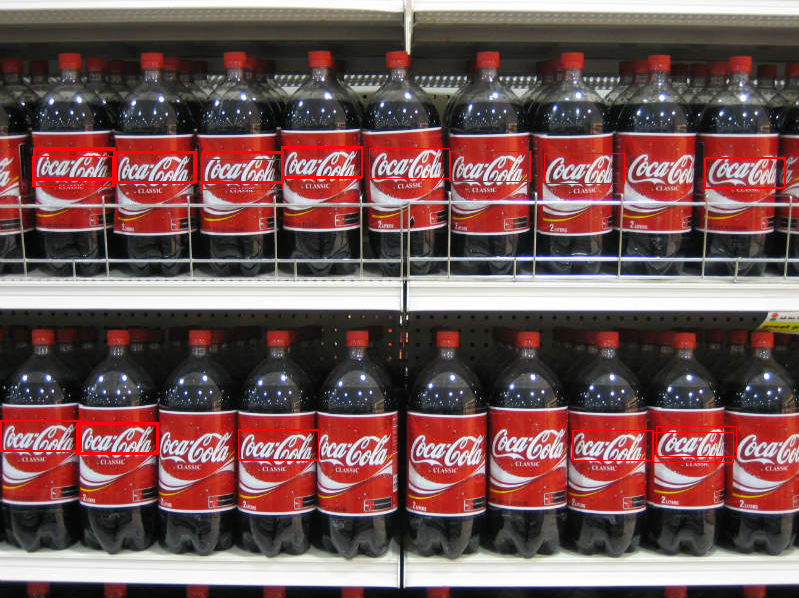

In [ ]:
img_rgb = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/coca_multi.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/temp_coca_multi.png',0)
musk_etiquetas=CrearMascara_etiquetas(img_rgb) #creo una mascara para evitar falsos positivos
soloEtiq_gray = cv.cvtColor(musk_etiquetas, cv.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
res = cv.matchTemplate(soloEtiq_gray,template,cv.TM_CCOEFF_NORMED)
# Fijamos un umbral de "coincidencia"

threshold = 0.3

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (10,2,254), 1)

cv2_imshow(img_rgb)
#cv.imwrite('res.png',img_rgb)

# Creamos una funcion para enmascarar el fondo  respecto de las etiquetas de Coca Cola

In [1]:
import cv2
import numpy as np

def CrearMascara_etiquetas(img):
    # Hacer una copia para no modificar la imagen original
    img_copy = img.copy()

    # 2. Conversión a HSV para segmentación por color
    hsv = cv2.cvtColor(img_copy, cv2.COLOR_BGR2HSV)

    # 3. Definir rangos para el color rojo
    # Ajusta estos rangos (más saturación, diferente iluminación, etc.)
    lower_red_1 = np.array([0, 70, 50])
    upper_red_1 = np.array([10, 255, 255])
    lower_red_2 = np.array([170, 70, 50])
    upper_red_2 = np.array([180, 255, 255])

    # Crear dos máscaras y combinarlas
    mask1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(hsv, lower_red_2, upper_red_2)
    mask_red = cv2.bitwise_or(mask1, mask2)

    # 4. Operaciones morfológicas para suavizar la máscara
    # Un kernel grande ayuda a “cerrar” huecos en la etiqueta
    kernel_close = np.ones((15, 15), np.uint8)
    mask_closed = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel_close)

    # 5. Eliminamos ruidos pequeños (por ejemplo, tapas y pequeñas manchas)
    #    5.1. Buscamos contornos en la máscara 'mask_closed'
    contours, _ = cv2.findContours(mask_closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #    5.2. Creamos una nueva máscara para dibujar únicamente los contornos grandes (etiquetas)
    mask_filtered = np.zeros_like(mask_closed)

    # Definir un área mínima para descartar tapas (objetos pequeños)
    min_area = 2000  # Ajusta este valor según el tamaño de tus imágenes

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            # Rellenamos en la máscara los contornos grandes
            cv2.drawContours(mask_filtered, [cnt], -1, 255, thickness=-1)

    # 6. Volvemos a cerrar huecos dentro de las etiquetas con un cierre morfológico adicional
    kernel_close2 = np.ones((10, 10), np.uint8)
    mask_final = cv2.morphologyEx(mask_filtered, cv2.MORPH_CLOSE, kernel_close2)

    # 7. Aplicamos la máscara final a la copia de la imagen para mostrar SOLO las etiquetas
    result = cv2.bitwise_and(img_copy, img_copy, mask=mask_final)

    # 8. Retornamos el resultado (la imagen con solo las etiquetas visibles)
    return result


# codigo inutilizado

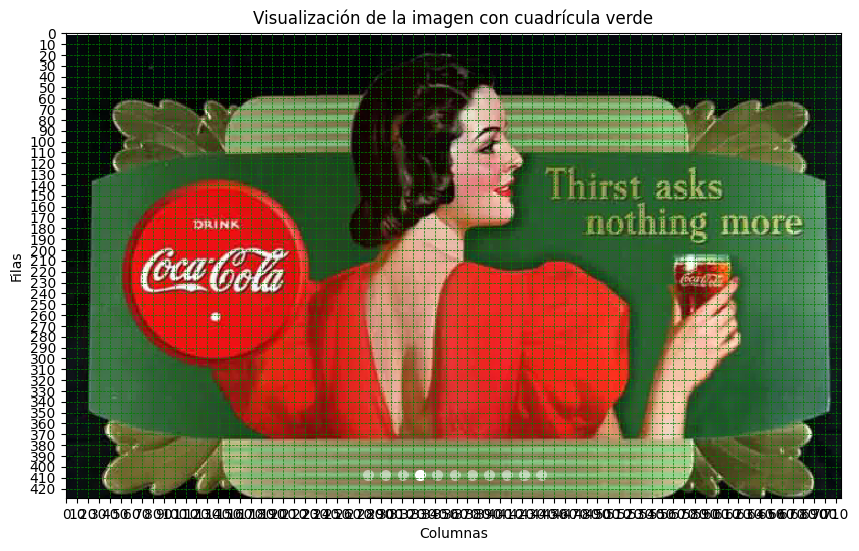

In [78]:
"""
temp_img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/VC1/Tp3_VC1/Imagenes/temp_coca_retro_2.png')
#codigo usado para obtener las dimensiones de los logos en cada imagen
# Supongamos que 'img_rgb' es tu imagen en formato RGB ya cargada
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura
plt.imshow(img_rgb, interpolation='nearest')  # Visualiza sin suavizado

plt.title("Visualización de la imagen con cuadrícula verde")
plt.xlabel("Columnas")
plt.ylabel("Filas")

# Obtener dimensiones de la imagen
height, width, _ = img_rgb.shape

# Definir espacio entre ticks (cuadrícula más chica)
tick_spacing = 10

# Configurar ticks para los ejes X e Y
plt.xticks(range(0, width, tick_spacing))
plt.yticks(range(0, height, tick_spacing))

# Agregar una cuadrícula con líneas verdes y más finas
plt.grid(True, which='both', color='green', linestyle='--', linewidth=0.5)

plt.show()
"""

In [ ]:
"""
w, h =cv.cvtColor(musk_roja_blanco_resize_150_50,cv.COLOR_RGB2GRAY).shape[::-1]
template=cv.cvtColor(musk_roja_blanco_resize_150_50,cv.COLOR_RGB2GRAY)
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
list__rest=[]
for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida =img_gray.copy()

    method = eval(meth)

    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_salida,template, method)
    list__rest.append(res)
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w , top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 0, 2)

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()
    """